# Pengantar CNN



---


Pengertian CNN

Convolutional Neural Network (CNN) adalah salah satu jenis neural network yang biasa digunakan pada data image. CNN bisa digunakan untuk mendeteksi dan mengenali object pada sebuah image. CNN adalah sebuah teknik yang terinspirasi dari cara mamalia — manusia, menghasilkan persepsi visual

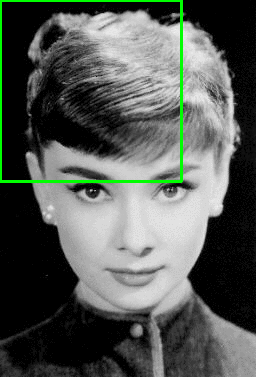



---

ARSITEKTUR CNN

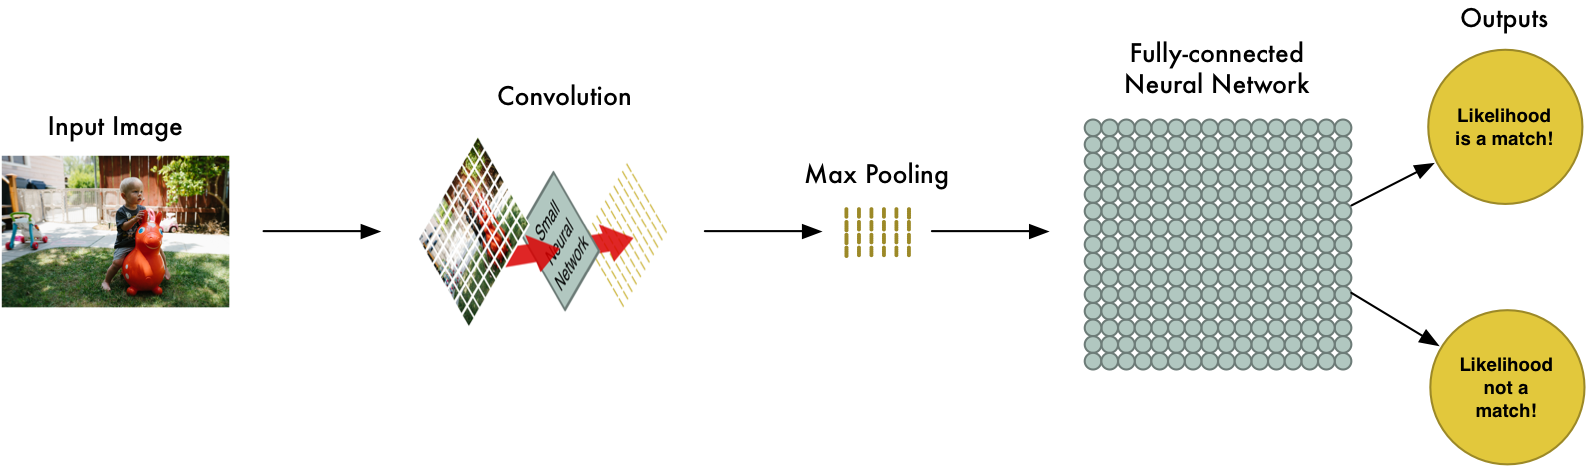

Arsitektur dari CNN dibagi menjadi 2 bagian besar, Feature Extraction Layer dan Fully-Connected Layer (MLP).


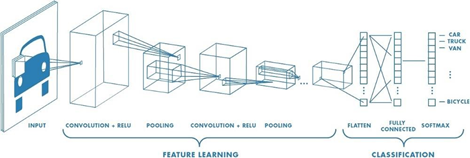

# Download Data From Kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/Kaggle"

In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Kaggle

/content/gdrive/MyDrive/Colab Notebooks/Kaggle


In [ ]:
!kaggle datasets download -d waifuai/cat2dog

 73% 20.0M/27.4M [00:00<00:00, 89.5MB/s]
100% 27.4M/27.4M [00:00<00:00, 91.2MB/s]


In [ ]:
!mv "/content/gdrive/MyDrive/Colab Notebooks/Kaggle/cat2dog.zip" "/content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/Dataset"

In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/Dataset

/content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/Dataset


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  cat2dog.zip
  inflating: cat2dog/cat2dog/testA/103.jpg  
  inflating: cat2dog/cat2dog/testA/104.jpg  
  inflating: cat2dog/cat2dog/testA/13.jpg  
  inflating: cat2dog/cat2dog/testA/136.jpg  
  inflating: cat2dog/cat2dog/testA/138.jpg  
  inflating: cat2dog/cat2dog/testA/14.jpg  
  inflating: cat2dog/cat2dog/testA/143.jpg  
  inflating: cat2dog/cat2dog/testA/144.jpg  
  inflating: cat2dog/cat2dog/testA/171.jpg  
  inflating: cat2dog/cat2dog/testA/176.jpg  
  inflating: cat2dog/cat2dog/testA/178.jpg  
  inflating: cat2dog/cat2dog/testA/192.jpg  
  inflating: cat2dog/cat2dog/testA/195.jpg  
  inflating: cat2dog/cat2dog/testA/21.jpg  
  inflating: cat2dog/cat2dog/testA/213.jpg  
  inflating: cat2dog/cat2dog/testA/214.jpg  
  inflating: cat2dog/cat2dog/testA/221.jpg  
  inflating: cat2dog/cat2dog/testA/228.jpg  
  inflating: cat2dog/cat2dog/testA/253.jpg  
  inflating: cat2dog/cat2dog/testA/254.jpg  
  inflating: cat2dog/cat2dog/testA/26.jpg  
  inflating: cat2dog/cat2dog/testA/26

# Cek Dataset

In [2]:
# check quantity of images in training and testing using lambda
import os

train_dir = "/content/drive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/Dataset/cat2dog/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/Dataset/cat2dog/test"

cat_train_path = train_dir + '/cats'
dog_train_path = train_dir + '/dogs'
cat_val_path = val_dir + '/cats'
dog_val_path = val_dir + '/dogs'

cat_len_train = len(os.listdir(cat_train_path))
dog_len_train = len(os.listdir(dog_train_path))
cat_len_val = len(os.listdir(cat_val_path))
dog_len_val = len(os.listdir(dog_val_path))

print("jumlah dataset Training : ", cat_len_train + dog_len_train)
print("jumlah dataset validasi : ", cat_len_val + dog_len_val)
print("\n\n")
print("jumlah train kelas Cat : ", cat_len_train)
print("jumlah train kelas Dog : ", dog_len_train)
print("jumlah validasi kelas Cat : ", cat_len_val)
print("jumlah validasi kelas Dog : ", dog_len_val)


jumlah dataset Training :  2035
jumlah dataset validasi :  200



jumlah train kelas Cat :  771
jumlah train kelas Dog :  1264
jumlah validasi kelas Cat :  100
jumlah validasi kelas Dog :  100


In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


AUgmentasi :
1. pada kasus ini dilakukan augmentasi untuk menghindari adanya overfitting pada saat pelatihan
2. augmentasi memungkinkan gambar training untuk dioptimalisasi seluruh infomasinya berupa melakukan rotate, shear, zoom, horizontal_flop, dan lainnya. sehingga ketika model dilatih menggunakan data yang memiliki angel (posisi) yang berbeda dapat teratasi karena menerapkan augmentasi 

# Augmentasi Dataset

In [4]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2035 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dropout, MaxPooling2D

# Arsitektur Model and Fit Model



---
Average Pooling VS Max Pooling

Gambar Average Pooling
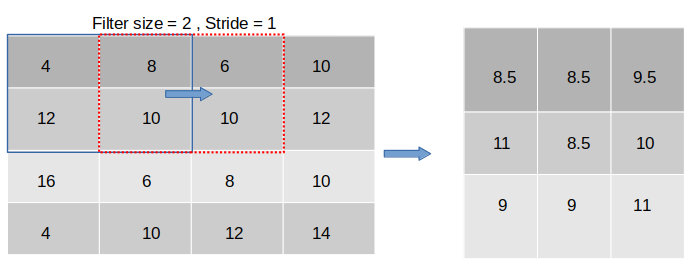


Gambar Max Pooling

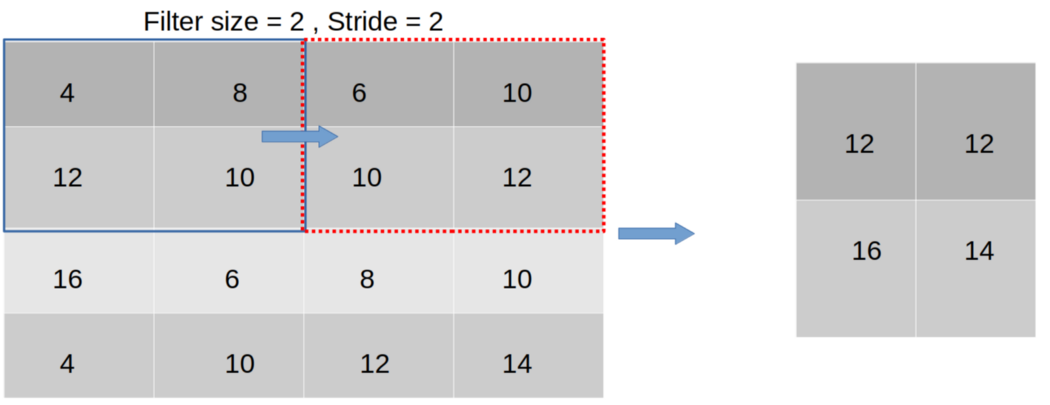

In [7]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dropout(0.0001))

In [8]:
# Fully Connected Layer
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.0001))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.0001))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 average_pooling2d (AverageP  (None, 75, 75, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 average_pooling2d_1 (Averag  (None, 38, 38, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 256)       295168    
                                                                 
 average_pooling2d_2 (Averag  (None, 19, 19, 256)      0

In [11]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

disini saya menggunakan 2 jenis callback dimana : 
1. callback pertama menggunakan EarlyStopping yang digunakan untuk memonitor kinerja dari pelatihan/epoch dimana jika vall_loss tidak mengalami perbaikan selama 30 epoch maka pelatihan akan dihentikan. 
2. callback kedua digunakan untuk melakukan saving mocel terbaik berdasarkan nilai dari val_acc

In [14]:
# setting Callback so we can save the best model in format h5 and i save it in my drive
callbacks = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='auto')        
directory_to_save_best_model_file = '/content/drive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/model_drop_batch_weight_from_callback_2.h5'
best_model = ModelCheckpoint(directory_to_save_best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [15]:
history = model.fit(
      train_generator,
      steps_per_epoch=102,  # images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10,  #  images = batch_size * steps
      callbacks = [callbacks, best_model])

Epoch 1/100
102/102 [==============================] - ETA: 0s - loss: 0.6712 - acc: 0.6216 
Epoch 00001: val_acc improved from -inf to 0.50000, saving model to /content/drive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/model_drop_batch_weight_from_callback_2.h5
102/102 [==============================] - 1436s 14s/step - loss: 0.6712 - acc: 0.6216 - val_loss: 0.7093 - val_acc: 0.5000
Epoch 2/100
102/102 [==============================] - ETA: 0s - loss: 0.6619 - acc: 0.6211
Epoch 00002: val_acc did not improve from 0.50000
102/102 [==============================] - 21s 207ms/step - loss: 0.6619 - acc: 0.6211 - val_loss: 0.6899 - val_acc: 0.5000
Epoch 3/100
102/102 [==============================] - ETA: 0s - loss: 0.6424 - acc: 0.6216
Epoch 00003: val_acc did not improve from 0.50000
102/102 [==============================] - 21s 206ms/step - loss: 0.6424 - acc: 0.6216 - val_loss: 0.6572 - val_acc: 0.5000
Epoch 4/100
102/102 [=======

# Model Evaluation

In [18]:
model.save('/content/drive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/model.h5')

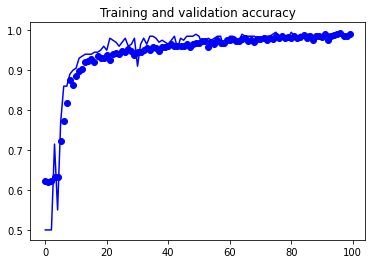

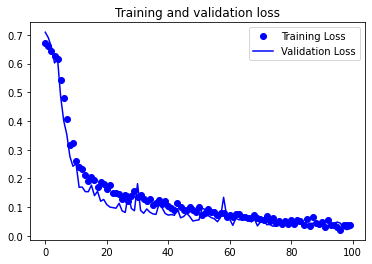

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Analisa Performa Model :

pada training dan validasi loss grafik terus menurun kebawah dan selaras. sehingga dapat disimpulkan bahwa model dalam keadaan good fit

In [ ]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = '/content/drive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/model_drop_batch_weight_from_callback.h5'
model = load_model(model_path)

Found 200 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Accuracy  : 0.995
Precision : 0.9950495049504952
f1Score : 0.9949998749968749
[[ 99   1]
 [  0 100]]


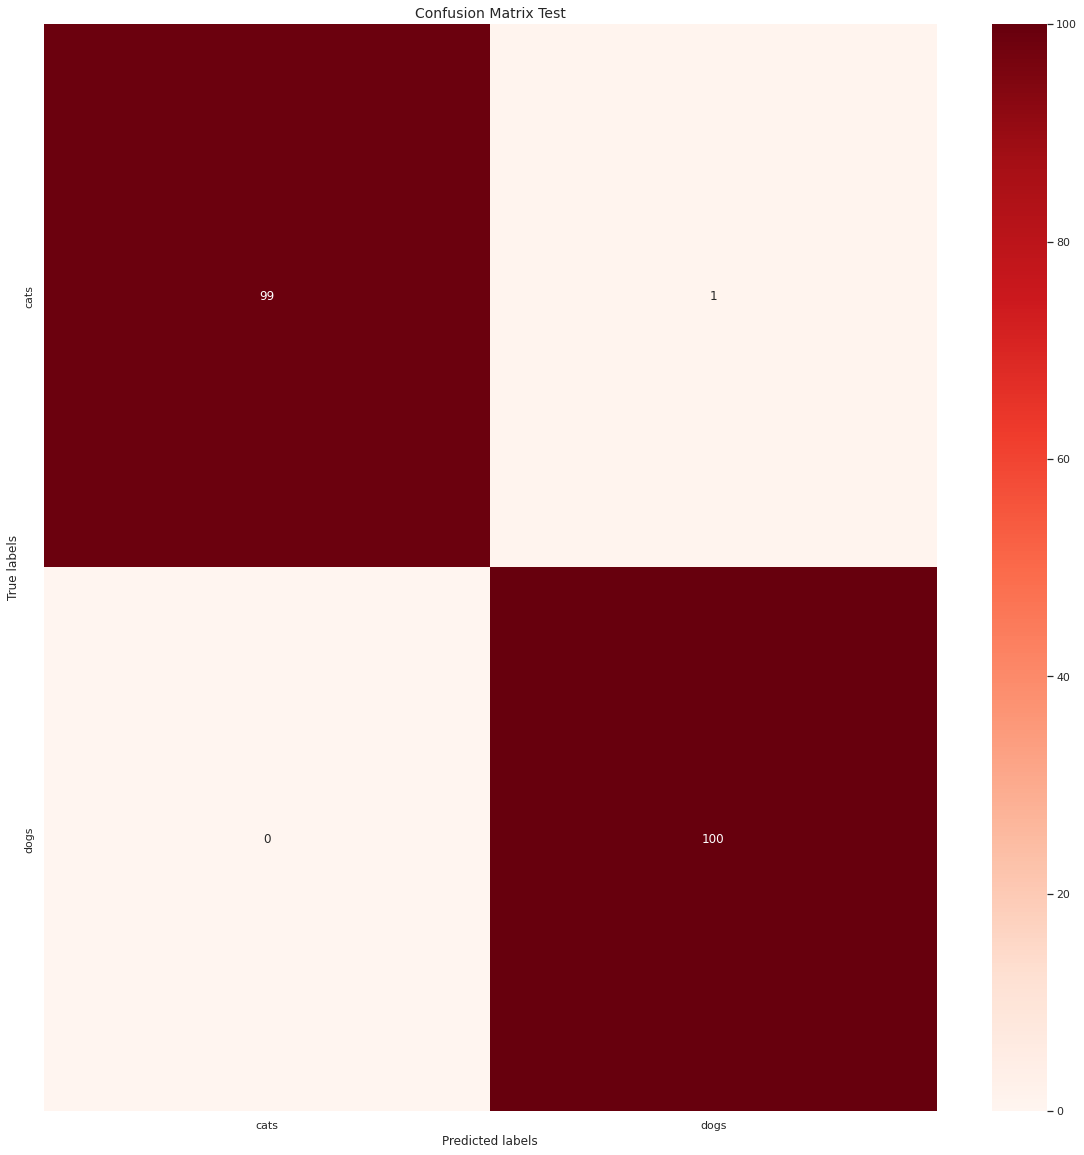

In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=150; width=150
batch_size=20

test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/drive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/Dataset/cat2dog/test'

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= None,
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(20,20))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

              precision    recall  f1-score   support

        cats       1.00      0.99      0.99       100
        dogs       0.99      1.00      1.00       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# loading model to evaluate more depth
import numpy as np
from keras.models import load_model
model_path = '/content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/model_drop_batch_weight_from_callback.h5'
model = load_model(model_path)

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path= fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 


Saving cat 1.jpg to cat 1.jpg
Saving cat 2.jpg to cat 2.jpg
Saving cat 3.jpg to cat 3.jpg
Saving cat 4.jpg to cat 4.jpg
Saving cat 5.jpg to cat 5.jpg
Saving dog 1.jpg to dog 1.jpg
Saving dog 2.jpg to dog 2 (2).jpg
Saving dog 3.jpg to dog 3.jpg
Saving dog 4.jpg to dog 4.jpg
Saving dog 5.jpg to dog 5.jpg
[1.]
cat 1.jpg is a dog
[1.]
cat 2.jpg is a dog
[1.]
cat 3.jpg is a dog
[1.]
cat 4.jpg is a dog
[0.]
cat 5.jpg is a cat
[1.]
dog 1.jpg is a dog
[1.]
dog 2.jpg is a dog
[1.]
dog 3.jpg is a dog
[1.]
dog 4.jpg is a dog
[1.]
dog 5.jpg is a dog
